In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
Alco = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
Alco.index.freq='MS'

In [2]:
train = Alco.iloc[:300]
test = Alco.iloc[300:]

In [3]:
scaler = MinMaxScaler()

In [4]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [5]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [6]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
# Архитектура RNN №1
model_rnn_1 = Sequential()
model_rnn_1.add(SimpleRNN(64, activation='relu', input_shape=(n_input, n_features)))
model_rnn_1.add(Dense(32, activation='relu'))
model_rnn_1.add(Dense(1))
model_rnn_1.compile(optimizer='adam', loss='mse')

# Архитектура RNN №2
model_rnn_2 = Sequential()
model_rnn_2.add(SimpleRNN(128, activation='tanh', input_shape=(n_input, n_features)))
model_rnn_2.add(Dense(64, activation='relu'))
model_rnn_2.add(Dense(32, activation='relu'))
model_rnn_2.add(Dense(1, activation='linear'))
model_rnn_2.compile(optimizer='rmsprop', loss='mse')

# Архитектура RNN №3
model_rnn_3 = Sequential()
model_rnn_3.add(SimpleRNN(256, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model_rnn_3.add(SimpleRNN(128, activation='relu'))
model_rnn_3.add(Dense(64, activation='relu'))
model_rnn_3.add(Dense(1))
model_rnn_3.compile(optimizer='Nadam', loss='mse')

Конфигурации архитектур

In [8]:
model_rnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6337 (24.75 KB)
Trainable params: 6337 (24.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model_rnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27009 (105.50 KB)
Trainable params: 27009 (105.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model_rnn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 12, 256)           66048     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 123649 (483.00 KB)
Trainable params: 123649 (483.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_rnn_1.fit(generator,epochs=100)

Epoch 1/100
288/288 [==============================] - 2s 2ms/step - loss: 0.0204
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 6/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 8/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 9/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 10/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 11/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 12/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 13/100


In [13]:
model_rnn_2.fit(generator,epochs=100)

Epoch 1/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 6/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 8/100
288/288 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 9/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 10/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 11/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 12/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 13/100


In [15]:
model_rnn_3.fit(generator,epochs=100)

Epoch 1/100
288/288 [==============================] - 3s 4ms/step - loss: 0.0151
Epoch 2/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0118
Epoch 3/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0093
Epoch 4/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0084
Epoch 5/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 6/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 7/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 8/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 9/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 10/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 11/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 12/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 13/100


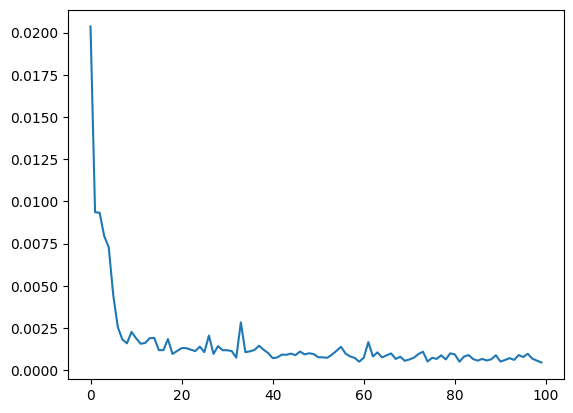

In [16]:
loss_per_epoch = model_rnn_1.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

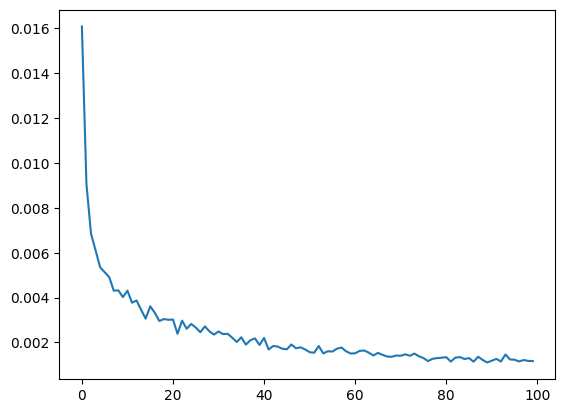

In [17]:
loss_per_epoch = model_rnn_2.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

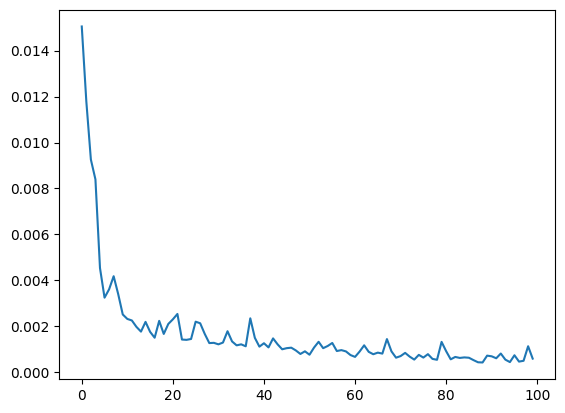

In [18]:
loss_per_epoch = model_rnn_3.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Arch 1 train scaled

In [19]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model_rnn_1.predict(last_train_batch)

1/1 [==============================] - 0s 146ms/step


array([[0.5717894]], dtype=float32)

In [21]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model_rnn_1.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [22]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

C:\Users\vinan\AppData\Local\Temp\ipykernel_4184\4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

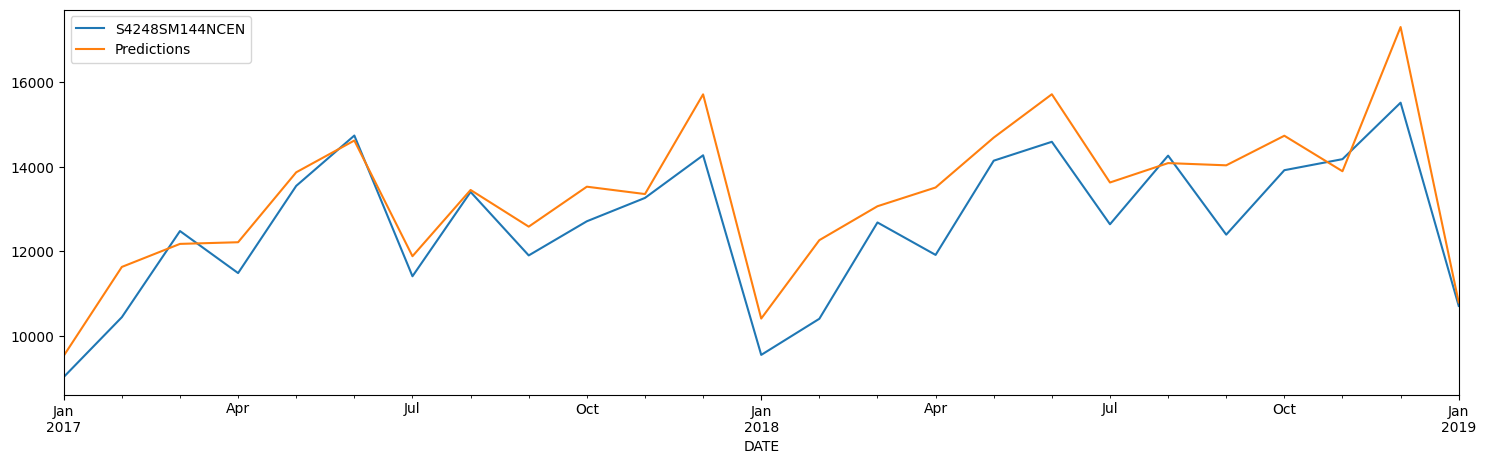

In [23]:
test.plot(figsize=(18,5))

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['S4248SM144NCEN'],test['Predictions']))
print(rmse)

933.1212414716246


Arch 2

In [25]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model_rnn_2.predict(last_train_batch)

1/1 [==============================] - 0s 117ms/step


array([[0.55335855]], dtype=float32)

In [30]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model_rnn_2.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [31]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

C:\Users\vinan\AppData\Local\Temp\ipykernel_4184\425898741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

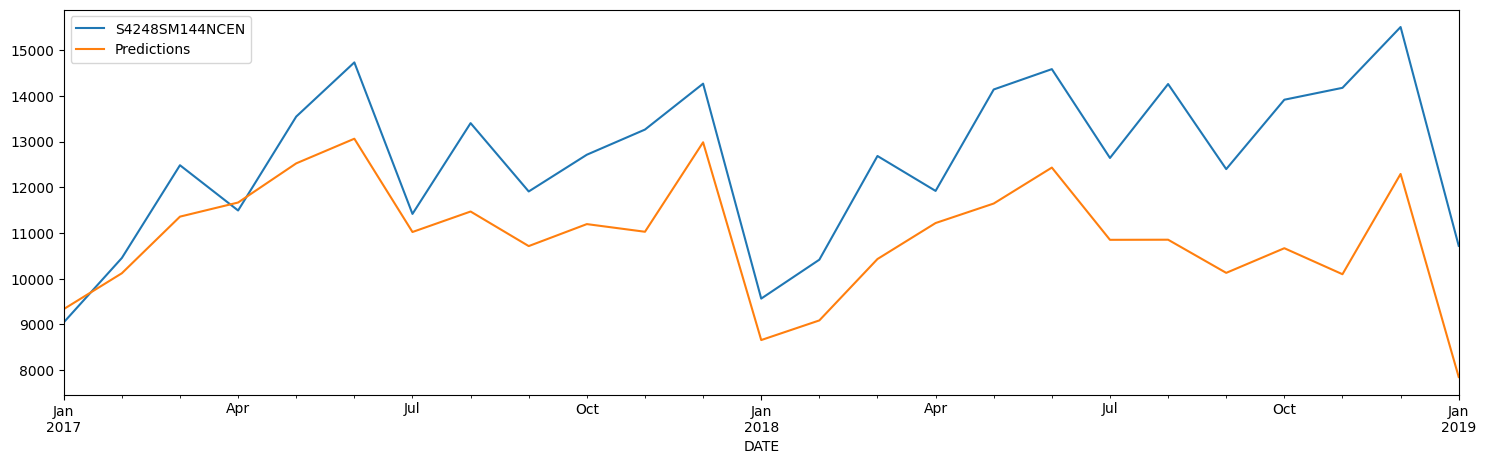

In [32]:
test.plot(figsize=(18,5))

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['S4248SM144NCEN'],test['Predictions']))
print(rmse)

2042.546897294203


Arch - 3

In [34]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model_rnn_3.predict(last_train_batch)

1/1 [==============================] - 0s 199ms/step


array([[0.56771046]], dtype=float32)

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model_rnn_3.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

C:\Users\vinan\AppData\Local\Temp\ipykernel_4184\4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

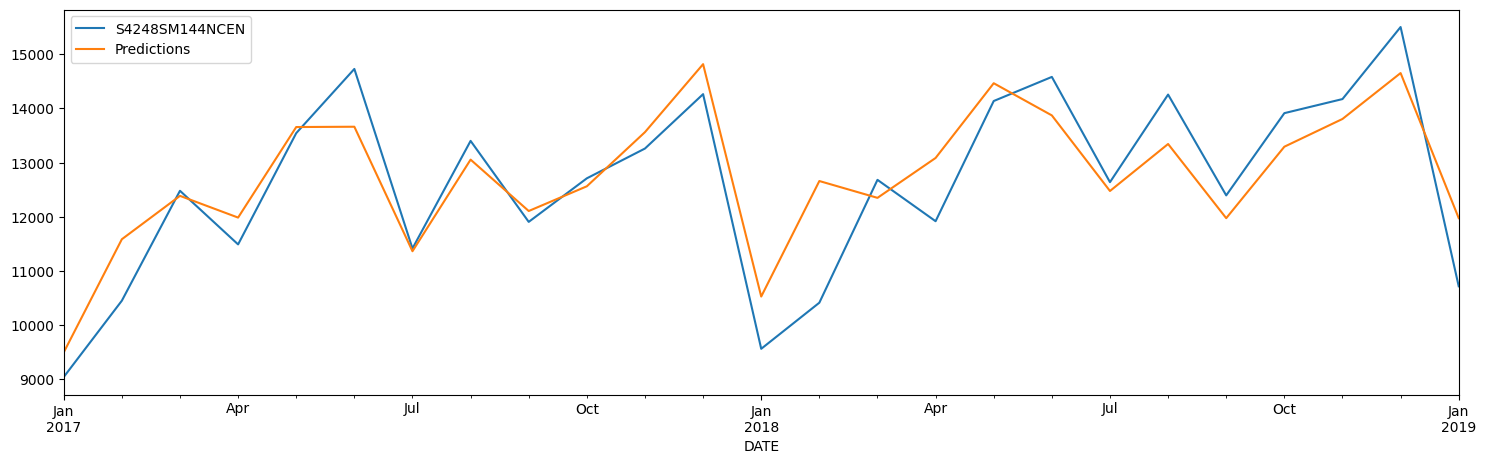

In [38]:
test.plot(figsize=(18,5))

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['S4248SM144NCEN'],test['Predictions']))
print(rmse)

784.8912024508916
